Wendepunkte (Volumen): [1]
Wendepunkte (pH): [1.09]
Äquivalenzpunkte (Volumen): [9]
Äquivalenzpunkte (pH): [2.28]
Neutralpunkt: 6.880476190476191
Puff-Bereich: [1.0, 12.52]
pKs: 3.0
pKb: 5.0


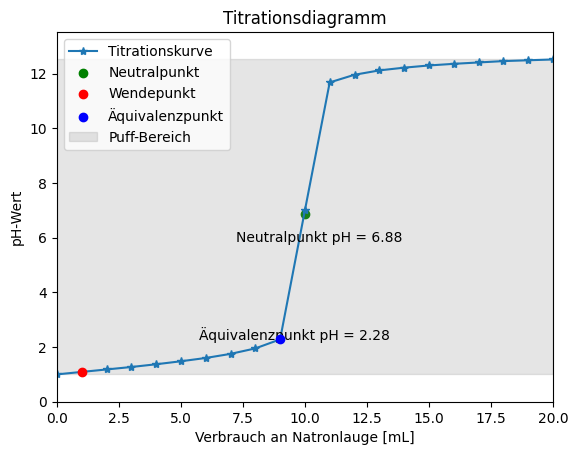

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import mplcursors
from io import BytesIO
import base64

data = pd.read_excel("Werte Titrationskurve Sifat.xlsx")
ph_werte = data["pH"]
verbrauch_naoh = data["Vn"]

# Automatische Anpassung von Neutralpunkt und Puff-Bereich
neutralpunkt = np.mean(ph_werte)
puff_bereich = [np.min(ph_werte), np.max(ph_werte)]

# Ableitung der pH-Werte nach dem Volumen der Natronlauge berechnen
ableitung = np.diff(ph_werte) / np.diff(verbrauch_naoh)

# Überprüfe, ob genügend Datenpunkte vorhanden sind
if len(ableitung) < 1:
    print("Nicht genügend Datenpunkte für die Ableitung.")
else:
    # Index des Wendepunkts (Maximum oder Minimum der Ableitung) finden
    wendepunkt_index = argrelextrema(ableitung, np.less)[0]

    # Überprüfe, ob Wendepunkte gefunden wurden
    if len(wendepunkt_index) == 0:
        print("Keine Wendepunkte gefunden.")
    else:
        # Wendepunkte und zugehörige pH-Werte
        wendepunkt_verbrauch = verbrauch_naoh[wendepunkt_index]
        wendepunkt_pH = ph_werte[wendepunkt_index]

        # Durchschnitt der x-Koordinaten der Wendepunkte für den Neutralpunkt
        neutralpunkt_x = 10

        # Äquivalenzpunkt(e) finden
        aequivalenzpunkt_index = argrelextrema(ableitung, np.greater)[0]
        aequivalenzpunkt_verbrauch = verbrauch_naoh[aequivalenzpunkt_index]
        aequivalenzpunkt_pH = ph_werte[aequivalenzpunkt_index]

        # Titrationskurve erstellen und darstellen
        fig, ax = plt.subplots()
        ax.plot(verbrauch_naoh, ph_werte, marker='*', label='Titrationskurve')
        ax.scatter([neutralpunkt_x], [neutralpunkt], color='green', marker='o', label='Neutralpunkt')
        ax.scatter(wendepunkt_verbrauch, wendepunkt_pH, color='red', label='Wendepunkt', zorder=5)
        ax.scatter(aequivalenzpunkt_verbrauch, aequivalenzpunkt_pH, color='blue', label='Äquivalenzpunkt', zorder=5)
        ax.fill_between(verbrauch_naoh, puff_bereich[0], puff_bereich[1], color='gray', alpha=0.2, label='Puff-Bereich')

        # Erweitern Sie die Achsenskalen
        ax.set_xlim([0, max(verbrauch_naoh)])
        ax.set_ylim([min(ph_werte) - 1, max(ph_werte) + 1])
        ax.set_xlabel("Verbrauch an Natronlauge [mL]")
        ax.set_ylabel("pH-Wert")
        ax.set_title("Titrationsdiagramm")
        ax.legend()

        # Texte mit Werten und Namen neben den Punkten hinzufügen
        ax.annotate(f'Neutralpunkt pH = {neutralpunkt:.2f}', (neutralpunkt_x, neutralpunkt),
                     textcoords="offset points", xytext=(10, -20), ha='center')
        ax.annotate(f'Äquivalenzpunkt pH = {aequivalenzpunkt_pH.iloc[0]:.2f}',
                     (aequivalenzpunkt_verbrauch.iloc[0], aequivalenzpunkt_pH.iloc[0]),
                     textcoords="offset points", xytext=(10, 0), ha='center')

        # Ausgabe von Wendepunkt, Äquivalenzpunkt und anderen Informationen
        print("Wendepunkte (Volumen):", wendepunkt_verbrauch.tolist())
        print("Wendepunkte (pH):", wendepunkt_pH.tolist())
        print("Äquivalenzpunkte (Volumen):", aequivalenzpunkt_verbrauch.tolist())
        print("Äquivalenzpunkte (pH):", aequivalenzpunkt_pH.tolist())
        print("Neutralpunkt:", neutralpunkt)
        print("Puff-Bereich:", puff_bereich)

        # Beispiel für die Berechnung von pKs oder pKb (ersetzen Sie dies durch die tatsächlichen Werte)
        saeure_konstante = 1e-3  # Beispiel für die Säurekonstante
        base_konstante = 1e-5   # Beispiel für die Basenkonstante

        pKs = -np.log10(saeure_konstante)
        pKb = -np.log10(base_konstante)

        print("pKs:", pKs)
        print("pKb:", pKb)

        # Verwenden Sie mplcursors für die Interaktivität
        cursor = mplcursors.cursor(hover=True)
        cursor.connect("add", lambda sel: sel.annotation.set_text(f"{sel.artist.get_label()}"))

        # Umwandlung des Plots in ein Byte-Objekt für die Anzeige in der Webanwendung
        img_data = BytesIO()
        plt.savefig(img_data, format='png')
        img_data.seek(0)

        # In eine Base64-codierte Zeichenkette umwandeln
        img_base64 = base64.b64encode(img_data.read()).decode("utf-8")

        # Anzeige des Plots in der Webanwendung
        plt.show()
